## Implementing the $k$-NN Classification

* Apply the $k$-NN Algorithm
* Using Cross Validation
* Apply Scaling

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

The common data set to validate classification algorithm's performance is the [Fisher Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly included in most stats or machine learning packages.

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [3]:
# the values of k in KNN
# we will examin the performance on different k values and explore what value gives the best result
n_neighbors = range(1, 51, 2)
print n_neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [21]:
iris = datasets.load_iris()
type(iris.target)
iris.target.shape
iris.target[0:1,]


array([0])

In [22]:
# Load in the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#list(iris.target)
iris_df['Target'] = iris.target

#iris.
print 'iris data head:'
print iris_df.head()
print 'iris describe():'
print iris_df.describe()

print "label set: " + repr(iris_df['Target'].unique())


iris data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
iris describe():
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000      

In [23]:
iris_df['sepal width (cm)'][0]

3.5

In [24]:
iris_df.plot?

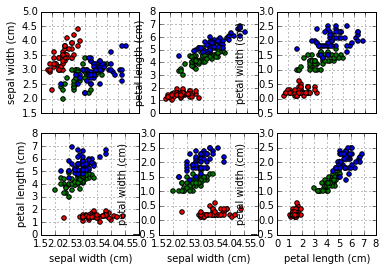

In [28]:
#Let's explore the data to get some intuition about it

#we'll plot 2x3 figures (why?)
fig, axes = plt.subplots(nrows=2, ncols=3)

colors = ['r','g','b']
for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=0,y=1, kind='scatter', c=colors[i], ax=axes[0,0])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=0,y=2, kind='scatter', c=colors[i], ax=axes[0,1])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=0,y=3, kind='scatter', c=colors[i], ax=axes[0,2])
    
for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=1,y=2, kind='scatter', c=colors[i], ax=axes[1,0])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=1,y=3, kind='scatter', c=colors[i], ax=axes[1,1])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=2,y=3, kind='scatter', c=colors[i], ax=axes[1,2])


tuple

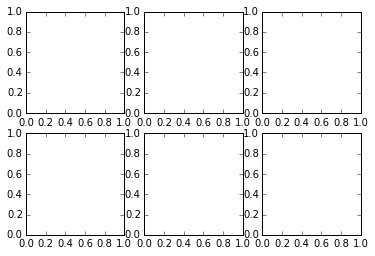

In [27]:
type(plt.subplots(nrows=2, ncols=3))

### Parameter Search

In [25]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)
print len(y_train)
print len(y_test)


# Try this sequence again with the following random seed.
# observe how it changes the scores of K quite dramatically
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

105
45


In [26]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print scores

[0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335]


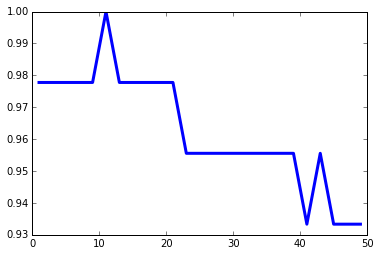

In [9]:
plt.plot(n_neighbors, scores, linewidth=3.0)

In [ ]:
#Why does the classification rate go down with more neighbors?



#If we have N points in our dataset, what would happen if we use N neighbors
#to classify each point




In [28]:
from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
type(iris_df.values)
iris_df.values[0:1]

array([[ 5.1,  3.5,  1.4,  0.2]])

### Application of Cross Validation

The work above shows that at 11 neighbors, we can get an ideal result that doesn't overfit the data. To verify this, we'll use cross validation.

In [29]:
from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)


In [30]:
print scores
print scores.mean()

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98


# Visualizaiton of the Decision Boundary between Classes

### We will just consider the last two features of the dataset for this visualization

In [31]:
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=11, p=2, weights='uniform')

In [32]:
h = 0.01  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [35]:
iris_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [55]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]
print x_min, y_min
print x_max, y_max


1.0 0.1
6.9 2.5


* [np.meshgrid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) (build grid)
* [ravel](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html) (flatten)
* [np.c_](http://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.c_.html#numpy.c_)
    * `np.c_[np.array([1,2,3]), np.array([4,5,6])]` will get `[[1, 4],[2, 5],[3, 6]]`

In [56]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print xx.shape
print yy.shape
xx[1:2,]
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print Z.shape

(240L, 590L)
(240L, 590L)
(141600L,)


In [57]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

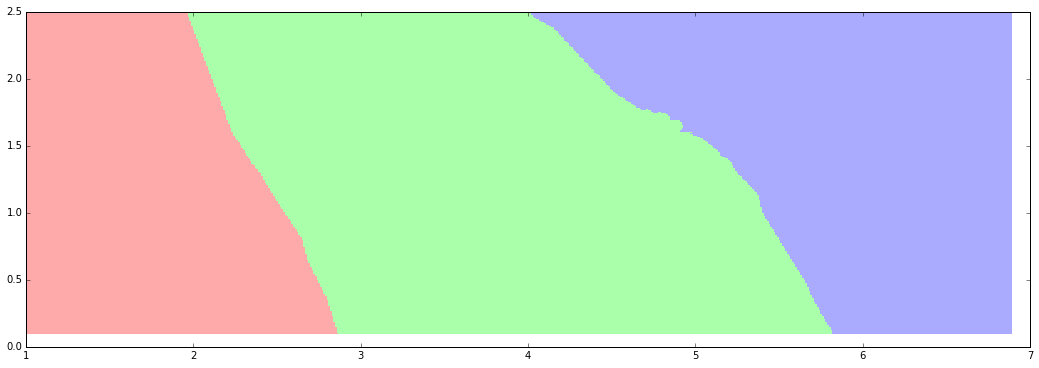

In [18]:
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

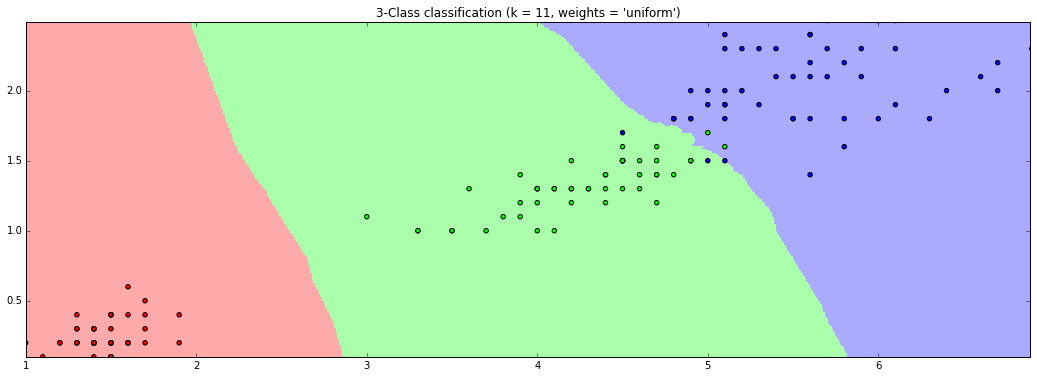

In [61]:
# Plot also the training points
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris.target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {}, weights = '{}')".format(clf.n_neighbors, clf.weights))

### Scaling

In [60]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
from sklearn.preprocessing import scale

In [63]:
df_norm = pd.DataFrame(scale(iris.data), columns=iris.feature_names)

In [64]:
df_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [65]:
df_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [66]:
iris = datasets.load_iris()
df_norm['Target'] = iris.target


In [36]:
df_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


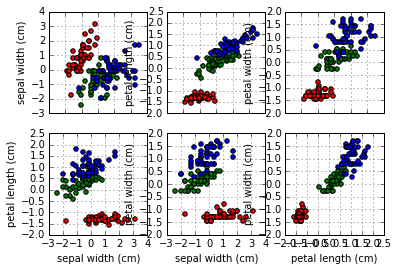

In [37]:
#Let's explore the data to get some intuition about it

#we'll plot 2x3 figures (why?)
fig, axes = plt.subplots(nrows=2, ncols=3)

colors = ['r','g','b']
for i in range(3): 
    tmp = df_norm[df_norm.Target == i]
    tmp.plot(x=0,y=1, kind='scatter', c=colors[i], ax=axes[0,0])

for i in range(3): 
    tmp = df_norm[df_norm.Target == i]
    tmp.plot(x=0,y=2, kind='scatter', c=colors[i], ax=axes[0,1])

for i in range(3): 
    tmp = df_norm[df_norm.Target == i]
    tmp.plot(x=0,y=3, kind='scatter', c=colors[i], ax=axes[0,2])
    
for i in range(3): 
    tmp = df_norm[df_norm.Target == i]
    tmp.plot(x=1,y=2, kind='scatter', c=colors[i], ax=axes[1,0])

for i in range(3): 
    tmp = df_norm[df_norm.Target == i]
    tmp.plot(x=1,y=3, kind='scatter', c=colors[i], ax=axes[1,1])

for i in range(3): 
    tmp = df_norm[df_norm.Target == i]
    tmp.plot(x=2,y=3, kind='scatter', c=colors[i], ax=axes[1,2])

In [46]:
df_norm.iloc[:,:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.iloc[:,:4], df_norm.Target, test_size=0.3, random_state=12)

In [51]:
print X_train

[[ -5.37177559e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00]
 [ -9.00681170e-01   1.72626612e+00  -1.22754100e+00  -1.31297673e+00]
 [ -4.16009689e-01   1.03205722e+00  -1.39813811e+00  -1.31297673e+00]
 [  1.03800476e+00   5.69251294e-01   1.10395287e+00   1.18500970e+00]
 [ -1.02184904e+00   8.00654259e-01  -1.28440670e+00  -1.31297673e+00]
 [  6.74501145e-01  -5.87763531e-01   1.04708716e+00   1.31648267e+00]
 [  1.89829664e-01   8.00654259e-01   4.21564419e-01   5.27644853e-01]
 [  1.28034050e+00   1.06445364e-01   6.49027235e-01   3.96171883e-01]
 [  3.10997534e-01  -3.56360566e-01   5.35295827e-01   2.64698913e-01]
 [ -6.58345429e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00]
 [  6.74501145e-01  -8.19166497e-01   8.76490051e-01   9.22063763e-01]
 [ -5.25060772e-02  -1.05056946e+00   1.37235899e-01   1.75297293e-03]
 [  3.10997534e-01  -1.24957601e-01   4.78430123e-01   2.64698913e-01]
 [  1.28034050e+00   3.37848329e-01   1.10395287e+00   1.44795564e+00]
 [ -1.

In [49]:
type(df_norm.Target)

pandas.core.series.Series

In [44]:
type(iris.data)

numpy.ndarray

In [43]:
type(iris.target)

numpy.ndarray

In [50]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print scores

[0.9555555555555556, 0.9555555555555556, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 1.0, 1.0, 1.0, 1.0, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884]


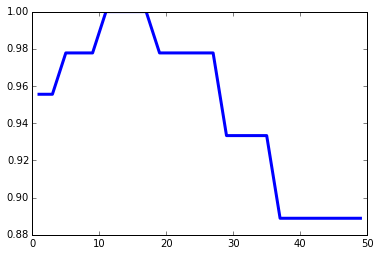

In [52]:
plt.plot(n_neighbors, scores, linewidth=3.0)

In [53]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(df_norm.iloc[:,:4], df_norm.Target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

In [54]:
print scores
print scores.mean()

[ 1.  1.  1.  1.  1.]
1.0


## Lab

1. Rerun the [parameter search](#Parameter-Search) with `random_state=8`. Do you get the same result for the optimal $k$
2. Rerun the whole lab but using [scaled](#Scaling) data
3. (Advanced) Write your own `classifyByKNeighbors` method:
```
score = classifyByKNeighbors(k, X_train, y_train, X_test, y_test)
```
or even better, your own `MyKNeighborsClassifier` class:
```
clf = MyKNeighborsClassifier(k)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
```